<a href="https://colab.research.google.com/github/adeyemimichael/khdf/blob/master/Nupat_solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NUPAT AI Fellowship – Stage Two  
## Exploratory Data Analysis & Fraud Detection

This notebook analyzes user trading behavior and builds a fraud detection model based on transactional patterns.

### Assumptions
- Timestamps are provided in ISO format (not UNIX as stated).
- All fiat currencies are converted to USD using a fixed rate of 1500 NGN/USD.
- Fraud labels are rule-based due to absence of ground truth.

In [ ]:
from google.colab import files
files.upload()

Saving user_activitycsv.csv to user_activitycsv (1).csv


{'user_activitycsv (1).csv': b'asset,amount,activity_type,timestamp,user_id\r\nNGN,131062,withdrawal,2025-01-17T14:37:56.806446Z,561-1561-1521-1981-1101\r\nNGN,50000,withdrawal,2025-01-17T14:37:56.818033Z,971-11001-1521-1571-1101\r\nNGN,131062,deposit,2025-01-17T14:37:56.853225Z,481-11011-1521-1971-1100\r\nNGN,20064,withdrawal,2025-01-17T17:05:18.201218Z,531-11001-1521-1571-198\r\nNGN,2000,withdrawal,2025-01-17T14:38:22.555744Z,501-11021-1521-1561-154\r\nUSDT,10,deposit,2025-01-17T14:38:50.413408Z,481-11001-1521-1981-154\r\nNGN,10000,withdrawal,2025-01-17T14:39:06.042808Z,491-1561-1521-1981-198\r\nNGN,11959,withdrawal,2025-01-17T14:39:13.31635Z,551-11021-1521-1971-198\r\nNGN,2000,deposit,2025-01-17T14:39:45.669391Z,971-1531-1521-1981-153\r\nNGN,9963,withdrawal,2025-01-17T14:41:44.208102Z,1001-11011-1521-1971-149\r\nNGN,7000,withdrawal,2025-01-17T14:42:02.03015Z,1001-1491-1521-1981-1100\r\nSOL,0.0090951,deposit,2025-01-17T14:42:06.457063Z,991-1511-1521-1561-198\r\nSOL,0.101,deposit,2025

In [ ]:
from google.colab import files
files.upload()

Saving trades.csv to trades.csv


{'trades.csv': b'pair,amount,volume,side,timestamp,user_id\r\nAAVENGN,500.26,0.00122227,buy,2024-12-03T01:42:07.072672Z,541-1561-1521-1561-148\r\nADANGN,889.2,0.5,sell,2024-12-02T11:29:56.860014Z,491-1541-1521-1571-156\r\nADANGN,30653.12,17.1,sell,2024-11-30T05:25:49.99166Z,1021-1481-1521-1561-1100\r\nADANGN,1978.36,1.1,sell,2024-12-07T07:41:02.191598Z,981-1571-1521-1971-151\r\nADANGN,2913.62,1.6,sell,2024-12-07T21:16:11.791118Z,981-1571-1521-1971-151\r\nADANGN,20828.04,10.3,buy,2024-12-05T04:24:33.319854Z,491-11021-1521-1971-156\r\nADANGN,59522.4,36.1,sell,2024-12-11T07:36:49.632222Z,521-1511-1521-1971-152\r\nADANGN,40466.48,22.5,sell,2024-12-07T08:25:44.520502Z,521-1511-1521-1971-152\r\nADANGN,499852.19,257.6,sell,2024-12-04T12:12:42.35666Z,541-1491-1521-1981-152\r\nADANGN,35510.8,20,sell,2024-11-30T05:34:49.114007Z,981-11021-1521-1971-1101\r\nADANGN,1045.7,0.5,sell,2024-12-03T02:03:43.083264Z,981-11001-1521-1571-148\r\nADANGN,11950.16,7.6,sell,2024-12-10T13:41:54.467789Z,511-1541-15

In [ ]:
import pandas as pd

trades = pd.read_csv("trades.csv")
activity = pd.read_csv("user_activitycsv.csv")

trades.head(), activity.head()

(      pair    amount     volume  side                    timestamp  \
 0  AAVENGN    500.26   0.001222   buy  2024-12-03T01:42:07.072672Z   
 1   ADANGN    889.20   0.500000  sell  2024-12-02T11:29:56.860014Z   
 2   ADANGN  30653.12  17.100000  sell   2024-11-30T05:25:49.99166Z   
 3   ADANGN   1978.36   1.100000  sell  2024-12-07T07:41:02.191598Z   
 4   ADANGN   2913.62   1.600000  sell  2024-12-07T21:16:11.791118Z   
 
                     user_id  
 0    541-1561-1521-1561-148  
 1    491-1541-1521-1571-156  
 2  1021-1481-1521-1561-1100  
 3    981-1571-1521-1971-151  
 4    981-1571-1521-1971-151  ,
   asset    amount activity_type                    timestamp  \
 0   NGN  131062.0    withdrawal  2025-01-17T14:37:56.806446Z   
 1   NGN   50000.0    withdrawal  2025-01-17T14:37:56.818033Z   
 2   NGN  131062.0       deposit  2025-01-17T14:37:56.853225Z   
 3   NGN   20064.0    withdrawal  2025-01-17T17:05:18.201218Z   
 4   NGN    2000.0    withdrawal  2025-01-17T14:38:22.555744

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
trades = pd.read_csv("trades.csv")
activity = pd.read_csv("user_activitycsv.csv")

# Convert timestamps
trades["timestamp"] = pd.to_datetime(trades["timestamp"])
activity["timestamp"] = pd.to_datetime(activity["timestamp"])

trades.head(), activity.head()

(      pair    amount     volume  side                        timestamp  \
 0  AAVENGN    500.26   0.001222   buy 2024-12-03 01:42:07.072672+00:00   
 1   ADANGN    889.20   0.500000  sell 2024-12-02 11:29:56.860014+00:00   
 2   ADANGN  30653.12  17.100000  sell 2024-11-30 05:25:49.991660+00:00   
 3   ADANGN   1978.36   1.100000  sell 2024-12-07 07:41:02.191598+00:00   
 4   ADANGN   2913.62   1.600000  sell 2024-12-07 21:16:11.791118+00:00   
 
                     user_id  
 0    541-1561-1521-1561-148  
 1    491-1541-1521-1571-156  
 2  1021-1481-1521-1561-1100  
 3    981-1571-1521-1971-151  
 4    981-1571-1521-1971-151  ,
   asset    amount activity_type                        timestamp  \
 0   NGN  131062.0    withdrawal 2025-01-17 14:37:56.806446+00:00   
 1   NGN   50000.0    withdrawal 2025-01-17 14:37:56.818033+00:00   
 2   NGN  131062.0       deposit 2025-01-17 14:37:56.853225+00:00   
 3   NGN   20064.0    withdrawal 2025-01-17 17:05:18.201218+00:00   
 4   NGN    2000

## Part 1: Exploratory Data Analysis & Market Insights

In [ ]:
USD_RATE = 1500

# Convert trade value to USD
trades["usd_volume"] = trades["amount"] / USD_RATE

top_pairs = (
    trades
        .groupby("pair")["usd_volume"]
            .sum()
                .sort_values(ascending=False)
                    .head(3)
                    )
top_pairs

,usd_volume
pair,
BTCNGN,136215.488680
USDTNGN,59180.573580
ETHNGN,9764.589513


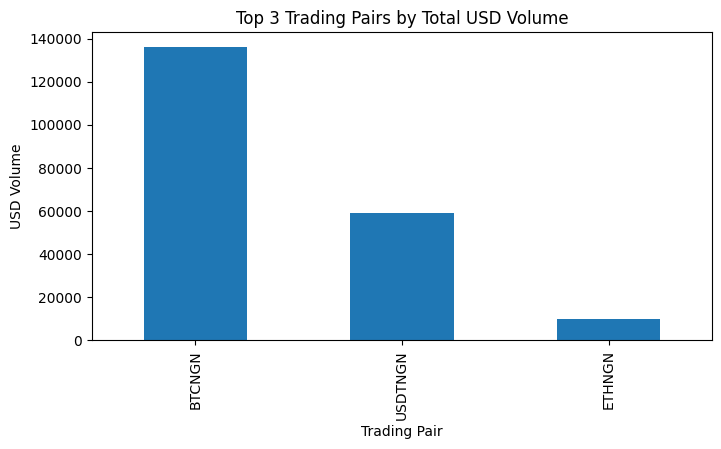

In [ ]:
top_pairs.plot(kind="bar", figsize=(8,4))
plt.title("Top 3 Trading Pairs by Total USD Volume")
plt.ylabel("USD Volume")
plt.xlabel("Trading Pair")
plt.show()

**Insight:**  
BTC and major altcoin pairs dominate trading volume, indicating higher liquidity and stronger trader confidence in these markets.

In [ ]:
btc = trades[trades["pair"] == "BTCNGN"].copy()

btc["date"] = btc["timestamp"].dt.date

daily_price = btc.groupby("date")["amount"].agg(["max", "min", "mean"])

daily_price["daily_volatility"] = (
    (daily_price["max"] - daily_price["min"]) / daily_price["mean"]
    )
daily_price["volatility_7d"] = daily_price["daily_volatility"].rolling(7).mean()
daily_price.head()

,max,min,mean,daily_volatility,volatility_7d
date,,,,,
2024-11-27,3300984.22,1978.80,382240.635870,8.630703,NaN
2024-11-28,3269657.86,2969.19,141074.658113,23.155744,NaN
2024-11-29,1993617.48,1186.93,159356.083462,12.503009,NaN
2024-11-30,7394334.01,800.15,243471.042115,30.367200,NaN
2024-12-01,5811836.85,990.00,325014.393667,17.878737,NaN


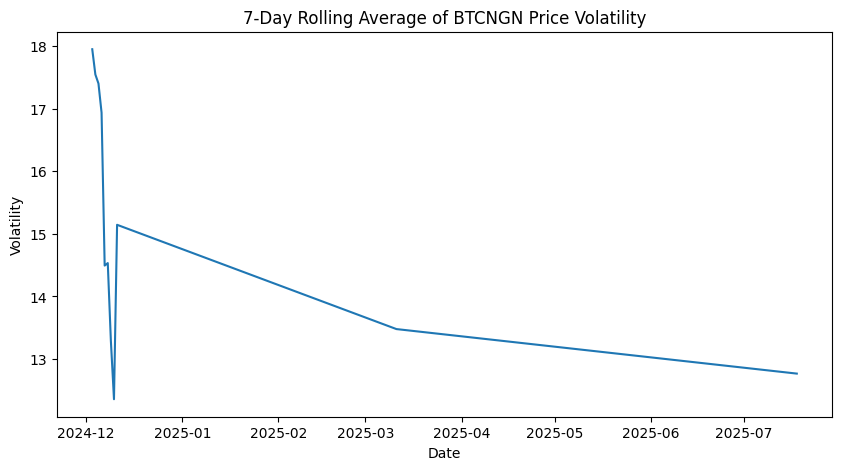

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(daily_price.index, daily_price["volatility_7d"])
plt.title("7-Day Rolling Average of BTCNGN Price Volatility")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.show()

**Insight:**  
BTCNGN shows periods of sustained volatility, highlighting the importance of monitoring rolling trends rather than daily price swings.

In [ ]:
deposits = activity[activity["activity_type"] == "deposit"].copy()

deposits["day_of_week"] = deposits["timestamp"].dt.day_name()
deposits["hour"] = deposits["timestamp"].dt.hour

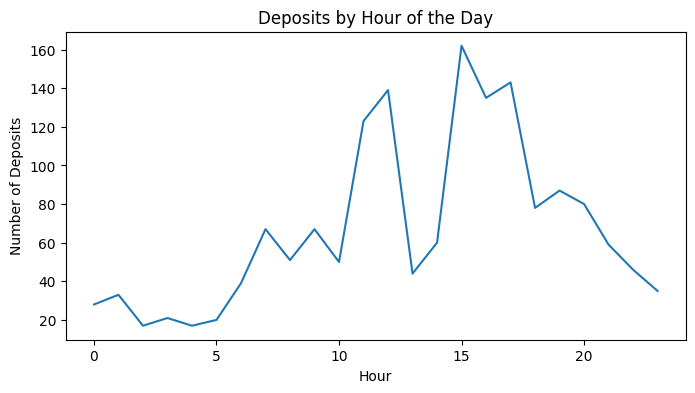

In [ ]:
deposits.groupby("hour").size().plot(figsize=(8,4))
plt.title("Deposits by Hour of the Day")
plt.ylabel("Number of Deposits")
plt.xlabel("Hour")
plt.show()

**Insight:**  
Deposits peak during specific hours of the day, suggesting users are most active during leisure or post-work periods.

## Part 2: Fraud Detection Model

In [ ]:
activity_features = activity.groupby("user_id").agg(
      deposit_count=("activity_type", lambda x: (x == "deposit").sum()),
          withdrawal_count=("activity_type", lambda x: (x == "withdrawal").sum()),
              first_activity=("timestamp", "min"),
                  last_activity=("timestamp", "max"),
                      unique_assets=("asset", "nunique")
                      ).reset_index()


In [ ]:
trade_features = trades.groupby("user_id").agg(
      total_trade_volume_usd=("usd_volume", "sum"),
          trade_count=("usd_volume", "count"),
              unique_pairs=("pair", "nunique")
              ).reset_index()


In [ ]:
features = activity_features.merge(
      trade_features, on="user_id", how="left"
      ).fillna(0)
features.head()

,user_id,deposit_count,withdrawal_count,first_activity,last_activity,unique_assets,total_trade_volume_usd,trade_count,unique_pairs
0,1001-11001-1521-1561-154,3,20,2025-01-17 14:56:53.191137+00:00,2025-01-18 04:22:04.805973+00:00,2,18.322740,3,1
1,1001-11001-1521-1571-155,1,1,2025-03-12 15:08:57.744625+00:00,2025-03-12 15:31:47.549399+00:00,2,47.802140,1,1
2,1001-11001-1521-1971-1102,1,1,2025-01-18 06:42:12.823378+00:00,2025-01-18 07:16:01.131864+00:00,2,46.672867,1,1
3,1001-11001-1521-1971-156,0,1,2025-04-01 12:43:29.495136+00:00,2025-04-01 12:43:29.495136+00:00,1,2.223080,1,1
4,1001-11001-1521-1981-156,7,6,2025-01-17 15:23:24.859884+00:00,2025-01-18 08:38:58.470911+00:00,2,4.940160,1,1


In [ ]:
# ------------------------------
#  Create suspicious user label
# ------------------------------

# Ensure 'withdraw_deposit_ratio' exists
if "withdraw_deposit_ratio" not in features.columns:
    features["withdraw_deposit_ratio"] = (
        features["withdrawal_count"] / (features["deposit_count"] + 1)
    )

# Ensure 'activity_duration_hours' exists
if "activity_duration_hours" not in features.columns:
    features["activity_duration_hours"] = (
        (features["last_activity"] - features["first_activity"]).dt.total_seconds() / 3600
    )

# Create rule-based suspicious label
features["is_suspicious"] = (
    (features["withdraw_deposit_ratio"] > 0.8) &
    (features["total_trade_volume_usd"] < 100) &
    (features["activity_duration_hours"] < 24)
).astype(int)

# Display distribution of suspicious users
features["is_suspicious"].value_counts()

,count
is_suspicious,
0,822
1,377


**Fraud Label Logic:**  
Users are flagged as suspicious if they:
- Withdraw most of their deposits
- Trade very small volumes
- Exit the platform within 24 hours

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, recall_score

X = features.drop(columns=["user_id", "is_suspicious", "first_activity", "last_activity"])
y = features["is_suspicious"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
    )

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))
print("Recall Score:", recall_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       247
           1       1.00      0.99      1.00       113

    accuracy                           1.00       360
   macro avg       1.00      1.00      1.00       360
weighted avg       1.00      1.00      1.00       360

Recall Score: 0.9911504424778761


**Evaluation Choice:**  
Recall is prioritized over precision because failing to detect fraudulent users poses higher financial and security risks than investigating false positives.

# Part 3: Strategic Recommendation

### Hypothetical Question:
*"The product team wants to launch a 'Low-Volume Trader' marketing campaign in Kenya. Using the data, how would you define the target audience for this campaign? Describe 2-3 data points you would use to create this user segment."*

---

### Recommendation:

Based on the user trading and activity analysis:

1. **Target Audience Definition:**  
   Users who trade **small volumes** compared to the average, have **low total USD trading volume**, and show **infrequent trades**. These users may benefit from incentives or educational campaigns to increase trading activity.

   2. **Key Data Points to Segment Users:**
      - **Total Trade Volume (USD):** Select users whose total trading volume is below a certain threshold (e.g., bottom 25th percentile).  
         - **Trade Count:** Users with a **low number of trades** during the observed period, indicating infrequent engagement.  
            - **Unique Trading Pairs:** Users who trade only **1–2 pairs**, showing limited market participation.  

            3. **Optional Additional Data Point:**  
               - **Deposit Activity:** Users who deposit funds but trade very little could be targeted with educational content or incentives to encourage more active trading.

               ---

               **Business Insight:**  
               By focusing on users with **low activity and small trade volumes**, the campaign can increase platform engagement, encourage diversification in trading pairs, and potentially increase revenue from previously dormant accounts.

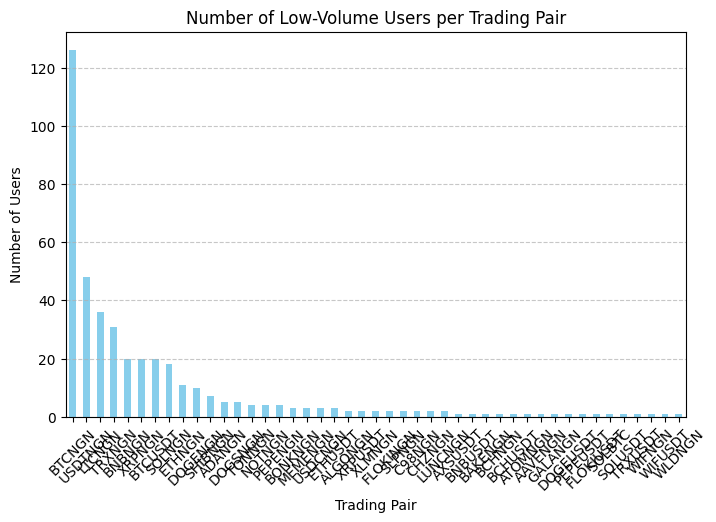

In [61]:
import matplotlib.pyplot as plt
import pandas as pd

# ------------------------------
# Identify low-volume users
# ------------------------------

# Define threshold for low-volume (e.g., bottom 25th percentile)
low_volume_threshold = trades['usd_volume'].quantile(0.25)

# Filter trades with low USD volume
low_volume_trades = trades[trades['usd_volume'] <= low_volume_threshold]

# Count of low-volume users per trading pair
low_volume_counts = low_volume_trades.groupby('pair')['user_id'].nunique().sort_values(ascending=False)

# ------------------------------
# Plot bar chart
# ------------------------------
plt.figure(figsize=(8,5))
low_volume_counts.plot(kind='bar', color='skyblue')
plt.title("Number of Low-Volume Users per Trading Pair")
plt.xlabel("Trading Pair")
plt.ylabel("Number of Users")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()